In [64]:
import numpy as np
import json
from ccfMitchell import ccf

In [47]:
aggDayPrev = json.load(open('aggDayPrev.json'))
aggDay = json.load(open('aggDay.json'))
assert len(aggDayPrev) == len(aggDay) and np.prod([aggDayPrev[i][0] == aggDay[i][0] for i in range(len(aggDayPrev))])
aggDayPrevNum = [i[1] for i in aggDayPrev]
aggDayNum = [i[1] for i in aggDay]


In [93]:
arr = np.correlate(aggDayNum/np.linalg.norm(aggDayNum), aggDayPrevNum/np.linalg.norm(aggDayPrevNum), mode='full')
amx = np.argmax(arr)
len(np.arange(-20,20+1)), len(arr[amx-20:amx+21])

(41, 41)

In [96]:
arr

array([2.87503953e-05, 6.51675626e-04, 1.24585046e-03, 1.32251818e-03,
       4.28380889e-03, 3.41171357e-03, 4.88756719e-03, 8.53886739e-03,
       7.70510593e-03, 1.86110892e-02, 3.66663374e-02, 4.21289125e-02,
       1.01555979e-01, 9.47708862e-02, 1.07986485e-01, 1.91669302e-01,
       2.15599214e-01, 2.00649008e-01, 1.91333880e-01, 2.98237433e-01,
       2.73416259e-01, 3.38717990e-01, 4.71084810e-01, 2.91251087e-01,
       2.48422582e-01, 3.94139169e-01, 2.90589828e-01, 2.29504822e-01,
       1.18442045e-01, 1.09424004e-01, 1.49914144e-01, 5.72649781e-02,
       7.28751600e-02, 4.84706011e-02, 3.81662424e-02, 5.54168254e-02,
       4.45682811e-02, 3.87262034e-02, 4.06094599e-02, 4.85798682e-02,
       5.57145297e-02, 5.94120091e-02, 5.84662798e-02, 7.21688848e-02,
       7.23777477e-02, 1.36319011e-01, 2.03418046e-01, 1.66196055e-01,
       1.96027291e-01, 1.96633701e-01, 2.33004768e-01, 2.46947465e-01,
       3.11578037e-01, 3.67406461e-01, 2.15669792e-01, 1.92751166e-01,
      

In [98]:
x = aggDayNum
y = aggDayPrevNum
correlate(x - np.mean(x), y - np.mean(y), method='direct') / (np.std(x) * np.std(y) * len(x))

array([ 2.33157060e-03, -3.84547592e-03, -9.56660455e-04, -1.69832692e-02,
       -3.11072601e-02, -3.13214856e-02, -6.27052761e-02, -7.71783225e-02,
       -8.99968806e-02, -8.83589422e-02, -6.55706274e-02, -7.08011213e-02,
        1.09901644e-02, -3.04308359e-03,  1.07147081e-02,  1.05506640e-01,
        1.28677480e-01,  1.11172874e-01,  8.76322474e-02,  2.08372057e-01,
        1.75043933e-01,  2.58586258e-01,  4.37276723e-01,  1.95217245e-01,
        1.36177920e-01,  3.35500091e-01,  1.94946848e-01,  1.09826562e-01,
       -3.84309594e-02, -4.93404055e-02,  1.78557772e-03, -1.23230906e-01,
       -1.02142245e-01, -1.32116928e-01, -1.44975913e-01, -1.25969010e-01,
       -1.37776884e-01, -1.59859964e-01, -1.69248633e-01, -1.56698224e-01,
       -1.46282520e-01, -1.39493079e-01, -1.41163259e-01, -1.26392929e-01,
       -1.28484849e-01, -4.68185928e-02,  3.79633401e-02, -1.59917550e-02,
        2.64096122e-02,  2.53223830e-02,  7.07408581e-02,  9.25907379e-02,
        1.76458801e-01,  

/Users/tejitpabari/Desktop/BangladeshFloodResearch/nlp_flood_research/bangladesh_flood_venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/Users/tejitpabari/Desktop/BangladeshFloodResearch/nlp_flood_research/bangladesh_flood_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  """


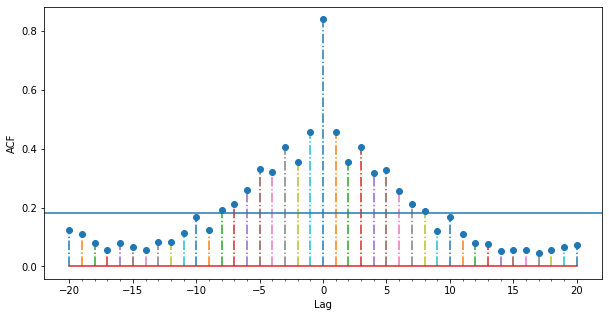

In [95]:
arr = np.correlate(aggDayNum/np.linalg.norm(aggDayNum), aggDayPrevNum/np.linalg.norm(aggDayPrevNum), mode='full')
amx = np.argmax(arr)
f, ax = plt.subplots(figsize = (10,5))
ax.stem(np.arange(-20,20+1), arr[amx-20:amx+21], '-.')
ax.set_xticks(np.arange(-20,20+1), 4)
ax.set_xlabel("Lag")
ax.set_ylabel("ACF")
conf95 = 1.96 / (np.sqrt(len(aggDayNum)))
ax.axhline(conf95)

plt.show()

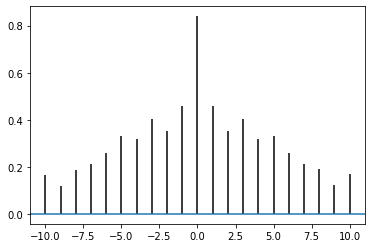

In [86]:
lags, c, line, b = plt.xcorr(aggDayPrevNum, aggDayNum, normed=True)

In [56]:
print('lags: {}\nc: {}'.format(lags, c))

lags: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
c: [0.16709177 0.12046071 0.1882205  0.21185382 0.25752146 0.32905201
 0.31927075 0.40500501 0.35340555 0.45828642 0.83995109 0.45828891
 0.35352712 0.40521721 0.31971142 0.33029793 0.25838814 0.21242032
 0.19053678 0.12281829 0.16878569]


In [63]:
correlate(aggDayPrevNum, aggDayNum)

array([8.92362356e-03, 2.02268801e-01, 3.86690354e-01, 4.10486684e-01,
       1.32961991e+00, 1.05893666e+00, 1.51701601e+00, 2.65031620e+00,
       2.39153111e+00, 5.77655899e+00, 1.13805946e+01, 1.30760831e+01,
       3.15212130e+01, 2.94152378e+01, 3.35171301e+01, 5.94908237e+01,
       6.69182531e+01, 6.22779688e+01, 5.93867148e+01, 9.25677217e+01,
       8.48636601e+01, 1.05132184e+02, 1.46216547e+02, 9.03992812e+01,
       7.71279939e+01, 1.22399767e+02, 9.03037243e+01, 7.15688561e+01,
       3.71736788e+01, 3.41223566e+01, 4.70901488e+01, 1.86588342e+01,
       2.37185291e+01, 1.71078924e+01, 1.50459803e+01, 2.59704602e+01,
       2.59525280e+01, 1.87187098e+01, 2.51583255e+01, 3.60615267e+01,
       3.93780498e+01, 4.24899812e+01, 4.56892019e+01, 5.39247848e+01,
       5.46858970e+01, 1.04093279e+02, 1.55298773e+02, 1.15804234e+02,
       1.24861891e+02, 1.25034786e+02, 1.46030417e+02, 1.55608823e+02,
       1.98825238e+02, 2.37275225e+02, 1.43361994e+02, 1.17150585e+02,
      

/Users/tejitpabari/Desktop/BangladeshFloodResearch/nlp_flood_research/classifier/ccfMitchell.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(np.arange(-lag_max,lag_max+1), result[lo:hi], '-.')
/Users/tejitpabari/Desktop/BangladeshFloodResearch/nlp_flood_research/classifier/ccfMitchell.py:29: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(np.arange(-lag_max,lag_max + 1), lag_max/5)


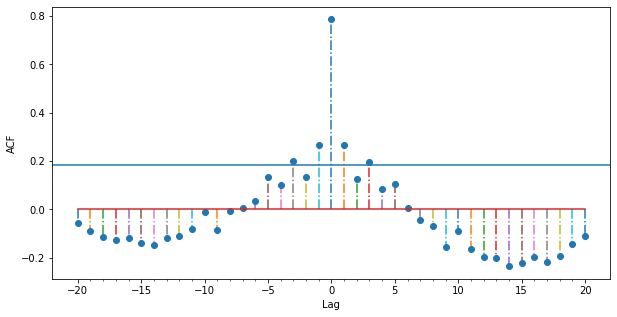

array([-0.05556295, -0.08836801, -0.11345347, -0.12580253, -0.11873898,
       -0.1392891 , -0.14865737, -0.11732539, -0.11192918, -0.08317116,
       -0.00947974, -0.08560049, -0.00571801,  0.00681373,  0.03515313,
        0.13278777,  0.1014428 ,  0.20117851,  0.13353002,  0.26825282,
        0.78634789,  0.26788582,  0.12753897,  0.1947695 ,  0.08416316,
        0.10424601,  0.00499779, -0.0450951 , -0.06841307, -0.15598739,
       -0.08768271, -0.16291157, -0.19878844, -0.20017115, -0.23636025,
       -0.22319078, -0.19563738, -0.21968226, -0.19423945, -0.14332391,
       -0.11207726])

In [67]:
ccf(np.array(aggDayPrevNum), np.array(aggDayNum), plot=True)